In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bubblewrap as bw
import bubblewrap.input_sources.functional as fin


In [2]:
obs, beh = fin.get_from_saved_npz("jpca_reduced_sc.npz")

In [3]:
#better?
nsteps = 1
alphas_shift = fin.bwrap_alphas_ahead(input_arr=obs, bw_params=dict(bw.default_parameters.default_jpca_dataset_parameters, num=60), nsteps=nsteps)
alphas_curr = fin.bwrap_alphas_ahead(input_arr=obs, bw_params=dict(bw.default_parameters.default_jpca_dataset_parameters, num=60), nsteps=0)


method = ['shift', 'curr'][1]


cut_beh = beh[-len(alphas_curr):]

reg = bw.regressions.SymmetricNoisyRegressor(input_d=alphas_curr.shape[1], output_d=1, forgetting_factor=.15, noise_scale=.2)
# reg = bw.regressions.NearestNeighborRegressor(input_d=alphas_curr.shape[1], output_d=1)
preds = []
cb = []
for i in range(nsteps, len(alphas_curr)-2):
    if method == 'shift':
        reg.safe_observe(alphas_shift[i-nsteps], cut_beh[i])
    elif method == 'curr':
        reg.safe_observe(alphas_curr[i], cut_beh[i])
    
    
    preds.append(reg.predict(alphas_shift[i]))
    cb.append(cut_beh[i+nsteps])


preds = np.squeeze(preds[np.nonzero(np.isfinite(preds))[0][0]:])[-1000:]
cb = np.squeeze(cb)[-1000:]
print(np.corrcoef(preds[:],cb[:])[0,1])

0.9059124836513813


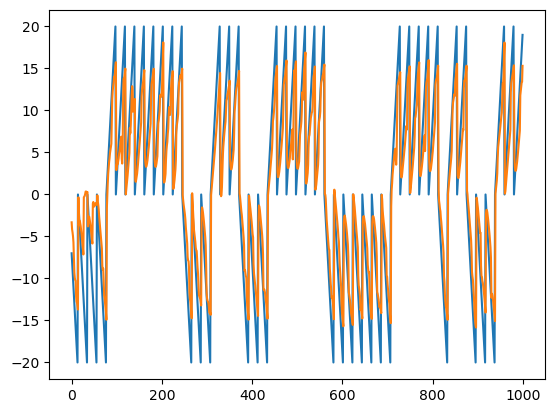

In [4]:
%matplotlib inline
fig, ax = plt.subplots()

ax.plot(cb)
ax.plot(preds);

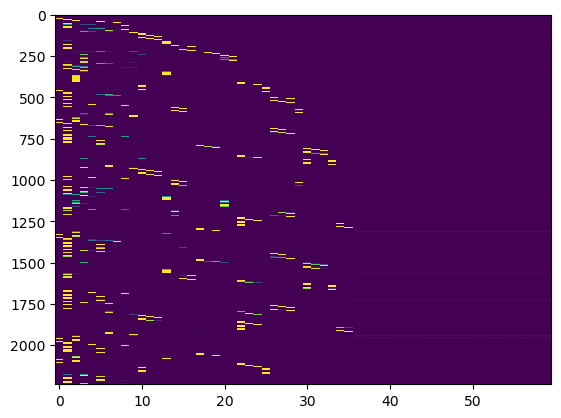

In [5]:
plt.imshow(alphas_curr, aspect='auto', interpolation='nearest')

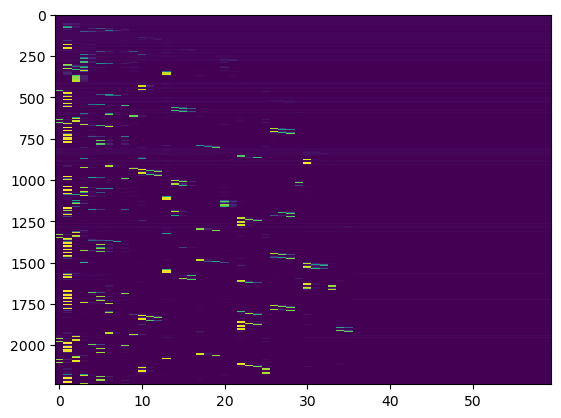

In [6]:
plt.imshow(alphas_shift, aspect='auto', interpolation='nearest')

0.00462546

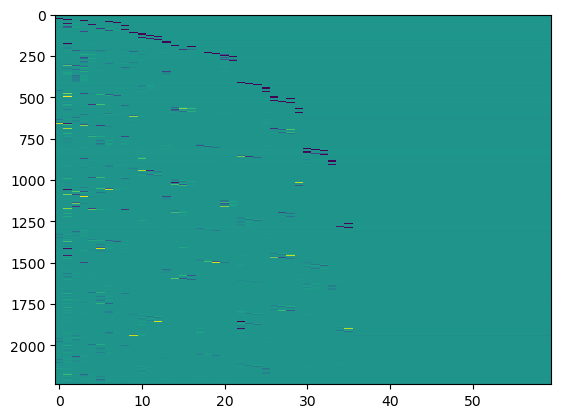

In [7]:
shift = 1
diff = alphas_shift[:-shift] - alphas_curr[shift:]
plt.imshow(diff, aspect='auto', interpolation='nearest')
(diff**2).mean()

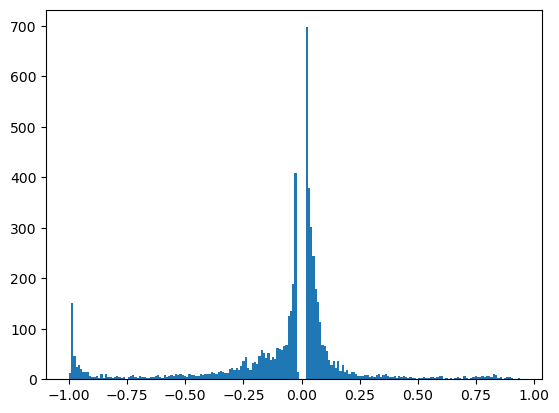

In [8]:
plt.hist(diff[abs(diff) > .02].flatten(), bins=200);